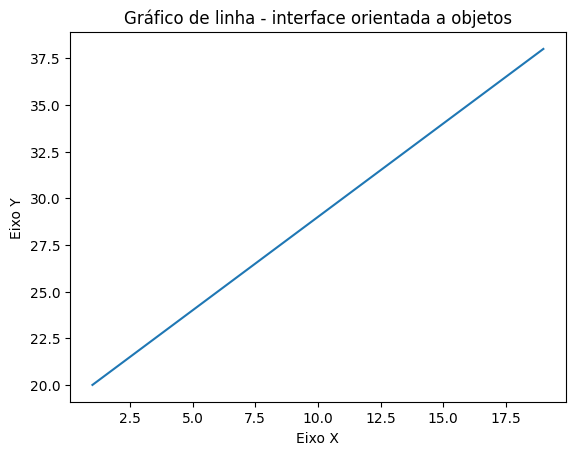

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Nossos dados para o gráfico
x = np.arange(1,20,2)
y = np.arange(20,40,2)

# Instancia os objetos Figure e o Axes em variáveis distintas 
fig, ax = plt.subplots()

# Aplicando métodos ao elemento Axes
ax.plot(x, y) # plota os dados das variáveis x e y no Axes
ax.set_xlabel('Eixo X') # nomeia o eixo x
ax.set_ylabel('Eixo Y') # nomeia o eixo y
ax.set_title('Gráfico de linha - interface orientada a objetos') # define o título do Axes

# Exibe o gráfico
plt.show()

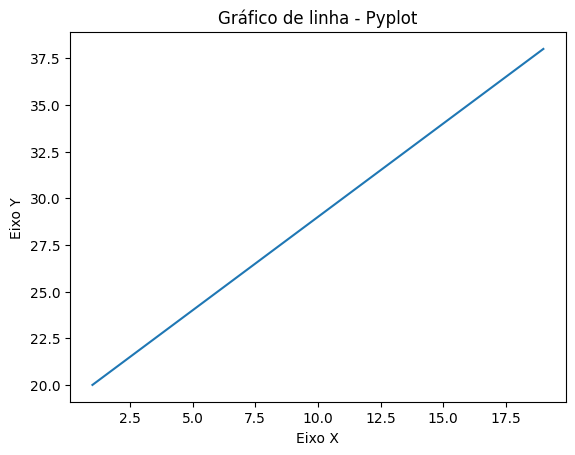

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo para o gráfico
x = np.arange(1,20,2)
y = np.arange(20,40,2)

# Cria implicitamente os elementos Figure e Axes
plt.plot(x, y)

# Adiciona os títulos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de linha - Pyplot')

# Exibe o gráfico
plt.show()